# EDA ON HABERMAN DATASET

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"C:\Users\RAVI KUMAR\Desktop\ASSIGNMENTS APPLIED ML\haberman.csv")

In [3]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
data.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [5]:
print(data.shape)

(306, 4)


In [6]:
print(data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


## There are no missing values in this data set.
## All the columns are of the integer data type.

In [13]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Patients are of Minimum age 30 and maximum age 83 years.
## minimum year of operation is 58 and maximum is 69.

In [8]:
data["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

## status 1 means YES (survived)
## status 2 means NO or Dead :-(
## Imbalanced dataset

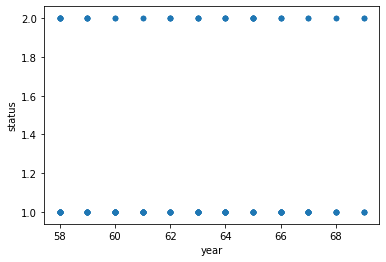

In [12]:
data.plot(kind="scatter", x="year", y="status")
plt.show()

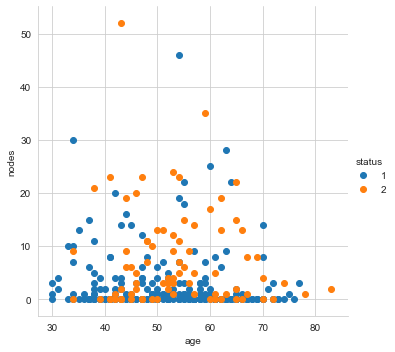

In [21]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="status",height=5)\
   .map(plt.scatter, "age", "nodes")\
   .add_legend();
plt.show();

## Patients with 0 nodes are more likely to survive irrespective of their age.
## There are hardly any patients who have nodes more than 25.
## Patients aged more than 50 with nodes more than 10 are less likely to survive.

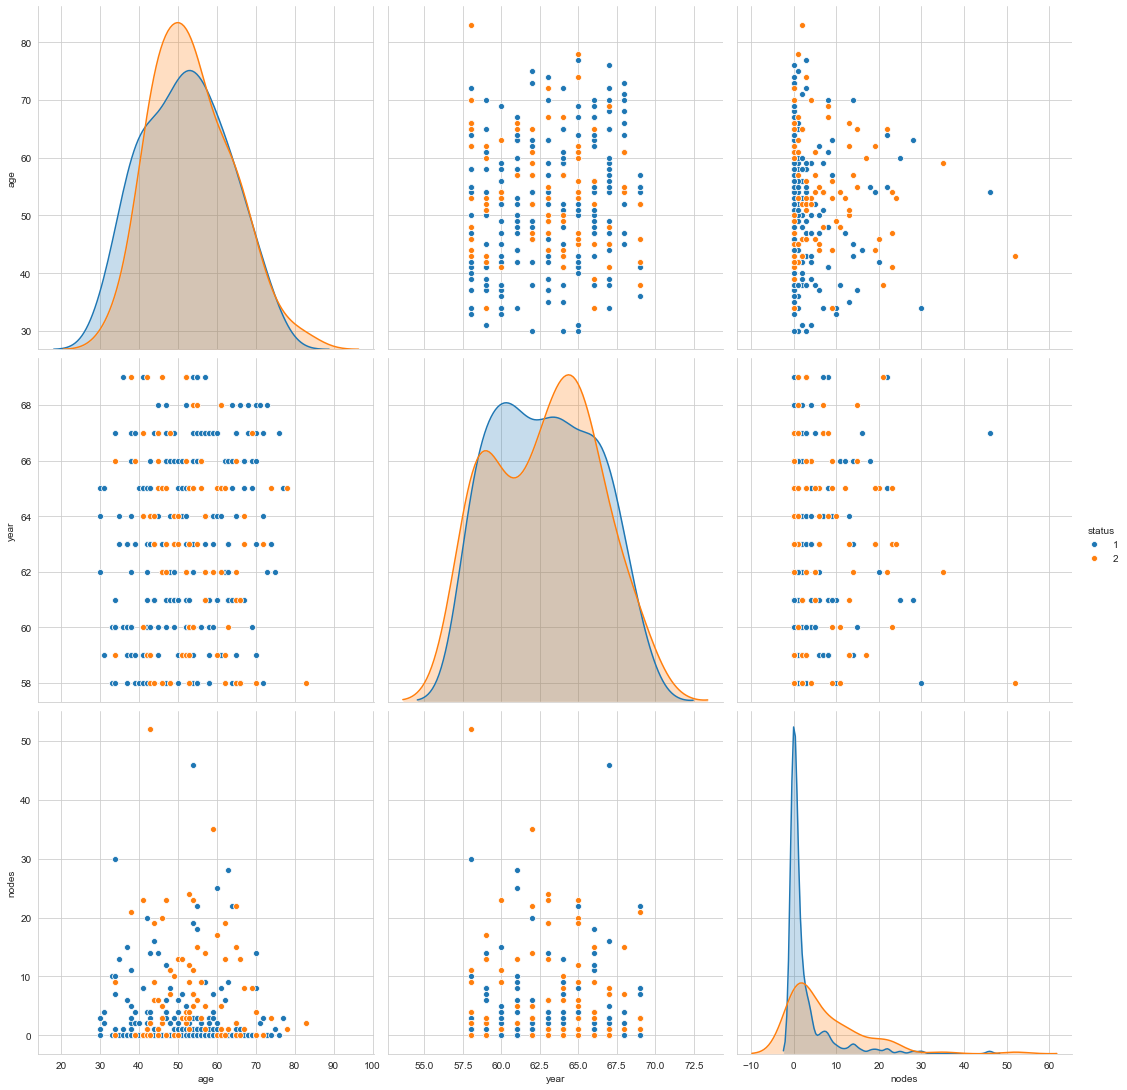

In [17]:
sns.set_style("whitegrid");
sns.pairplot(data, hue="status",height=5);
plt.show()

# Histogram & PDF

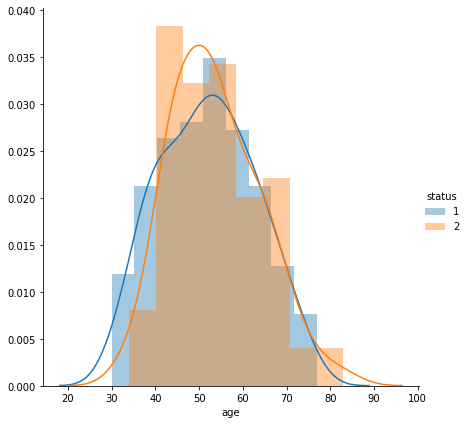

In [4]:
sns.FacetGrid(data, hue="status", height=6)\
   .map(sns.distplot, "age")\
   .add_legend();
plt.show();

## There is major overlapping observed. This graph only tells how many of the operations were successful and how many weren’t. This cannot be a parameter to decide the patient’s survival chances.

## However, it can be observed that in the years 1960 and 1965 there were more unsuccessful operations.

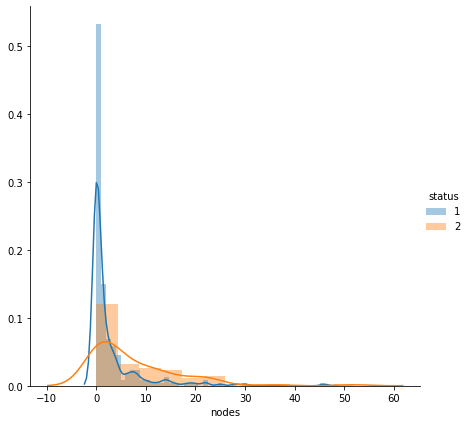

In [5]:
sns.FacetGrid(data, hue="status", height=6)\
   .map(sns.distplot, "nodes")\
   .add_legend();
plt.show();

## Patients with no nodes or 1 node are more likely to survive. There are very few chances of surviving if there are 25 or more nodes.


In [7]:
haber_survived=data.loc[data["status"]==1]
haber_dead=data.loc[data["status"]==2]

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


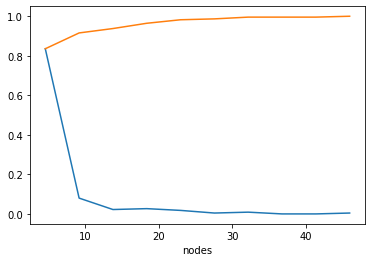

In [9]:
#PDF
counts, bin_edges=np.histogram(haber_survived["nodes"], bins=10, density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
#CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('nodes')
plt.show();

## 83.55% of the patients who have survived had nodes in the range of 0–5.
## Lesser number of nodes does result in more survival rates.

In [43]:
print("\nSurvived")
print("mean :" + str(np.mean(haber_survived["year"])))
print("median : " + str( np.median(haber_survived["year"])))
print("standard deviation: " + str( np.std(haber_survived["year"])))

print("\nDead")
print("mean :" + str(np.mean(haber_dead["year"])))
print("median :" + str(np.median(haber_dead["year"])))  
print("standard deviation: " + str( np.std(haber_dead["year"])))



Survived
mean :62.86222222222222
median : 63.0
standard deviation: 3.2157452144021956

Dead
mean :62.82716049382716
median :63.0
standard deviation: 3.3214236255207883


## mean ,medians and standard deviations for age and year are almost same for both the survived and dead patients

In [46]:
# Mean absolute deviation[MAD]
from statsmodels import robust
print(robust.mad(haber_survived["age"]))

13.343419966550417


# Boxplot

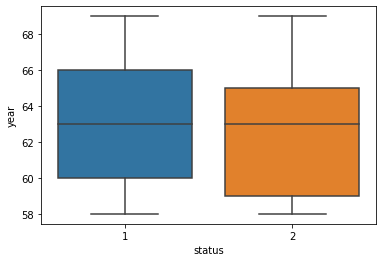

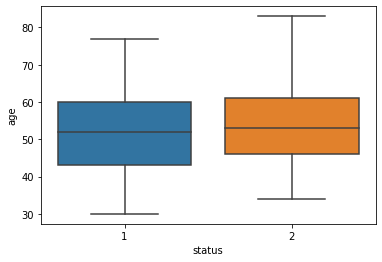

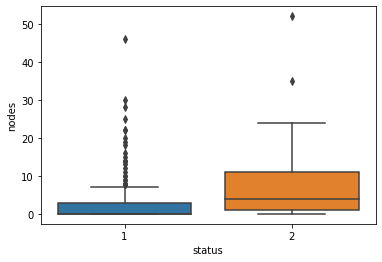

In [10]:
sns.boxplot(x="status", y="year", data=data)
plt.show()

sns.boxplot(x="status", y="age", data=data)
plt.show()

sns.boxplot(x="status", y="nodes", data=data)
plt.show()

# ViolinPlot

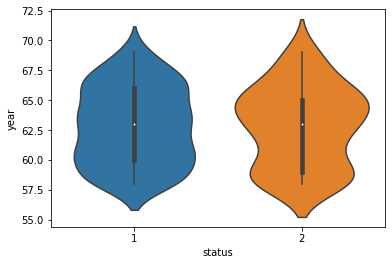

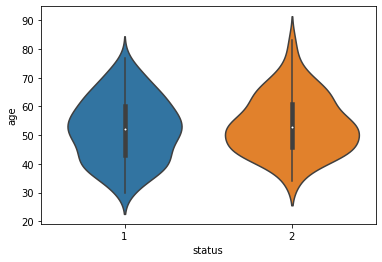

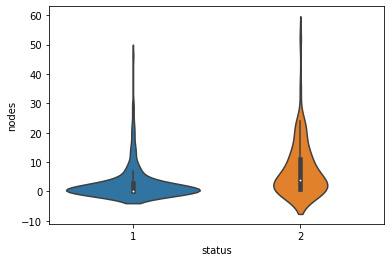

In [11]:
sns.violinplot(x="status", y="year", data=data, height=6)
plt.show()

sns.violinplot(x="status", y="age", data=data, height=6)
plt.show()

sns.violinplot(x="status", y="nodes", data=data, height=6)
plt.show()

## Patients with more than 1 nodes are not likely to survive.
## A large percentage of patients who survived had 0 nodes. Yet there is a small percentage of patients who had no positive axillary nodes died within 5 years of operation, thus an absence of positive axillary nodes cannot always guarantee survival.
## There were comparatively more people who got operated in the year 1965 did not survive .
## There were comparatively more people in the age group 45 to 65 who did not survive. Patient age alone is not an important parameter in determining the survival of a patient.
## The box plots and violin plots for age and year parameters give similar results with a substantial overlap of data points. The overlap in the box plot and the violin plot of nodes is less compared to other features but the overlap still exists and thus it is difficult to set a mark to classify both classes of patients.

# Density plot

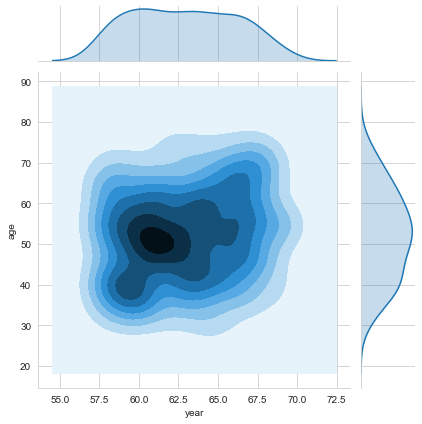

In [53]:
sns.jointplot(x="year",y="age", data=haber_survived, kind="kde", height=6)
plt.show()

## From 1960 to 1962, more operations done on the patients in the age group 45 to 55.